In [1]:
import pandas as pd 

data = pd.read_csv('../Dataset/clarity.csv')
data

,clarity,year,title,num_ref,num_ref_3years,arxiv,neurips,iclr,icml,aaai,...,atr37,atr38,atr39,citation_count,citedIn2018,citedIn2019,citedIn2020,citedIn2021,citedIn2022,citedIn2023
0,1,2019,Learning Latent Superstructures in Variational...,39,9,2,5,2,7,1,...,3,53,150,36,2.0,4.0,10.0,12.0,9.0,2.0
1,1,2018,A PAC-Bayesian Approach to Spectrally-Normaliz...,19,7,6,1,4,0,0,...,1,59,108,444,65.0,107.0,96.0,83.0,84.0,32.0
2,0,2020,Hamiltonian Generative Networks,31,12,4,1,6,1,0,...,5,63,186,133,0.0,8.0,52.0,47.0,30.0,9.0
3,0,2020,CM3: Cooperative Multi-goal Multi-stage Multi-...,55,23,3,6,7,9,4,...,0,111,224,188,2.0,7.0,7.0,14.0,15.0,6.0
4,1,2020,Why Gradient Clipping Accelerates Training: A ...,60,17,18,1,10,3,0,...,2,65,226,174,0.0,2.0,50.0,71.0,61.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1,2019,Subgradient Descent Learns Orthogonal Dictiona...,44,19,7,0,1,1,0,...,0,135,304,47,4.0,16.0,13.0,10.0,4.0,2.0
3196,1,2019,Selfless Sequential Learning,48,12,12,0,6,1,0,...,1,34,167,86,3.0,17.0,23.0,24.0,22.0,6.0
3197,0,2018,Deep Bayesian Bandits Showdown: An Empirical ...,47,12,4,1,8,7,1,...,3,76,266,253,15.0,45.0,70.0,80.0,47.0,21.0
3198,1,2017,Adversarial Training Methods for Semi-Supervis...,38,14,2,4,6,5,0,...,2,20,119,89,66.0,106.0,169.0,170.0,186.0,56.0


In [2]:
label_counts = data.groupby(['title', 'clarity']).size().unstack(fill_value=0)
dominant_labels = label_counts.idxmax(axis=1)
data = data.merge(dominant_labels.rename('dominant_label'), left_on='title', right_index=True)
df_filtered = data[data['clarity'] == data['dominant_label']]

label_counts_0 = data[data['clarity'] == 0].groupby('title').size().rename('count_0')
label_counts_1 = data[data['clarity'] == 1].groupby('title').size().rename('count_1')

df_filtered = df_filtered.merge(label_counts_0, left_on='title', right_index=True, how='left')
df_filtered = df_filtered.merge(label_counts_1, left_on='title', right_index=True, how='left')

df_filtered = df_filtered[df_filtered['count_0'] != df_filtered['count_1']]
df_filtered = df_filtered.drop(['dominant_label', 'count_0', 'count_1'], axis=1)

In [3]:
data = df_filtered.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1 to 3195
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   clarity         1275 non-null   int64  
 1   year            1275 non-null   int64  
 2   title           1275 non-null   object 
 3   num_ref         1275 non-null   int64  
 4   num_ref_3years  1275 non-null   int64  
 5   arxiv           1275 non-null   int64  
 6   neurips         1275 non-null   int64  
 7   iclr            1275 non-null   int64  
 8   icml            1275 non-null   int64  
 9   aaai            1275 non-null   int64  
 10  iccv            1275 non-null   int64  
 11  cvpr            1275 non-null   int64  
 12  emnlp           1275 non-null   int64  
 13  acl             1275 non-null   int64  
 14  naacl           1275 non-null   int64  
 15  eccv            1275 non-null   int64  
 16  icra            1275 non-null   int64  
 17  icassp          1275 non-null   i

In [4]:
data.to_csv('new-clarity.csv', index=False)

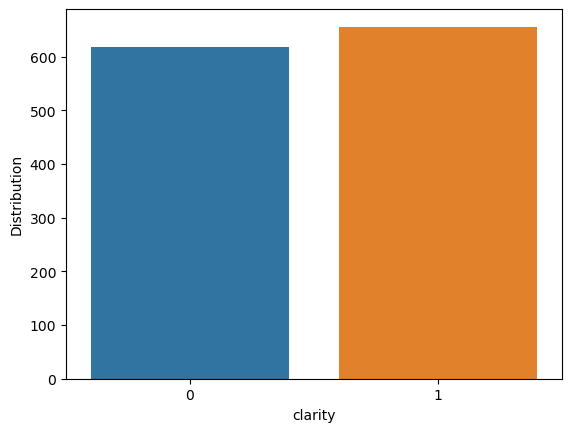

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['clarity'])
plt.ylabel('Distribution')
plt.show()

In [6]:
import plotly.graph_objects as go
import numpy as np

def correlation_matrix(dataframe):
    df_corr = dataframe.corr()
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            x = df_corr.columns,
            y = df_corr.index,
            z = np.array(df_corr),
            text=df_corr.values,
            texttemplate='%{text:.2f}'
        )
    )
    fig.show()

## Citing Sentence Predictor

In [7]:
citing_sentence = data[['atr0', 'atr1', 'atr2', 'atr3', 'atr4', 'atr5', 'atr6', 'atr7', 'atr8', 'atr9', 'atr10', 'atr11', 'atr12', 'atr13', 'atr14', 'atr15', 'atr16', 'atr17', 'atr18', 'atr19']]
y = data['clarity']

In [8]:
dataframe = citing_sentence.join([y])
correlation_matrix(dataframe)

In [9]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

def find_chi(features, y, k):
    chi_square = SelectKBest(score_func=chi2, k=k)
    fit = chi_square.fit(features, y)
    
    selected_feature_indices = chi_square.get_support(indices=True)
    feature_names = features.columns
    chi2_scores = fit.scores_
    feature_score_dict = dict(zip(feature_names, chi2_scores))
    sorted_features = sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True)
    selected_feature_names = [feature[0] for feature in sorted_features[:k]]
    
    print("Selected Feature Names:", selected_feature_names)
    x_chi = chi_square.fit_transform(features, y)
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x_chi)
    
    x_train, x_test, y_train, y_test = train_split(x, y)
    return x_train, x_test, y_train, y_test, selected_feature_names

In [10]:
from sklearn.model_selection import train_test_split

def train_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    return x_train, x_test, y_train, y_test

In [11]:
test = pd.DataFrame(columns=['Features', 'Accuracy'])

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def model(features, y, i):
    model = XGBClassifier()
    x_train, x_test, y_train, y_test, selected_feature_names = find_chi(features, y, i)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    new_data = pd.DataFrame({'Features': [selected_feature_names], 'Accuracy': ["%.2f%%" % (accuracy * 100.0)]})
    global test
    test = pd.concat([test, new_data], ignore_index=True)
    return accuracy

In [13]:
for i in dict(enumerate(citing_sentence)):
    accuracy = model(citing_sentence, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr1']
Accuracy: 50.20%
Selected Feature Names: ['atr1', 'atr7']
Accuracy: 51.76%
Selected Feature Names: ['atr1', 'atr7', 'atr19']
Accuracy: 52.94%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12']
Accuracy: 51.37%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9']
Accuracy: 51.76%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9', 'atr4']
Accuracy: 52.16%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9', 'atr4', 'atr18']
Accuracy: 57.25%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9', 'atr4', 'atr18', 'atr13']
Accuracy: 54.51%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9', 'atr4', 'atr18', 'atr13', 'atr14']
Accuracy: 57.25%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9', 'atr4', 'atr18', 'atr13', 'atr14', 'atr8']
Accuracy: 56.47%
Selected Feature Names: ['atr1', 'atr7', 'atr19', 'atr12', 'atr9', 'atr4', 'atr18', 'atr13', 'atr14', 'atr8', 'atr3'

## Regular Sentences Predictor

In [14]:
regular_sentences = data[['atr20', 'atr21', 'atr22', 'atr23', 'atr24', 'atr25', 'atr26', 'atr27', 'atr28', 'atr29', 'atr30', 'atr31', 'atr32', 'atr33', 'atr34', 'atr35', 'atr36', 'atr37', 'atr38', 'atr39']]

In [15]:
dataframe = regular_sentences.join([y])
correlation_matrix(dataframe)

In [16]:
for i in dict(enumerate(regular_sentences)):
    accuracy = model(regular_sentences, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr38']
Accuracy: 55.29%
Selected Feature Names: ['atr38', 'atr39']
Accuracy: 50.59%
Selected Feature Names: ['atr38', 'atr39', 'atr23']
Accuracy: 49.02%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26']
Accuracy: 49.41%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29']
Accuracy: 47.06%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29', 'atr34']
Accuracy: 47.06%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29', 'atr34', 'atr20']
Accuracy: 47.84%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29', 'atr34', 'atr20', 'atr25']
Accuracy: 52.55%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29', 'atr34', 'atr20', 'atr25', 'atr28']
Accuracy: 48.24%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29', 'atr34', 'atr20', 'atr25', 'atr28', 'atr21']
Accuracy: 44.31%
Selected Feature Names: ['atr38', 'atr39', 'atr23', 'atr26', 'atr29', 'atr34', 'atr20

## Reference-Based Predictor

In [17]:
reference_based = data[['num_ref', 'num_ref_3years', 'arxiv', 'neurips', 'iclr', 'icml', 'aaai', 'iccv', 'cvpr', 'emnlp', 'acl', 'naacl', 'eccv', 'icra', 'icassp', 'ijcai', 'aistats', 'sigkdd', 'neuralcom', 'ieee_tran', 'acm_tran', 'mit_press', 'nature', 'jmlr']]

In [18]:
dataframe = reference_based.join([y])
correlation_matrix(dataframe)

In [19]:
for i in dict(enumerate(reference_based)):
    accuracy = model(reference_based, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['neurips']
Accuracy: 49.02%
Selected Feature Names: ['neurips', 'num_ref_3years']
Accuracy: 50.98%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai']
Accuracy: 48.24%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra']
Accuracy: 50.20%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra', 'emnlp']
Accuracy: 49.80%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra', 'emnlp', 'iclr']
Accuracy: 50.59%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra', 'emnlp', 'iclr', 'acl']
Accuracy: 51.76%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra', 'emnlp', 'iclr', 'acl', 'icassp']
Accuracy: 53.33%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra', 'emnlp', 'iclr', 'acl', 'icassp', 'arxiv']
Accuracy: 56.08%
Selected Feature Names: ['neurips', 'num_ref_3years', 'ijcai', 'icra', 'emnlp', 'iclr', 'acl', 'icassp', 'arxiv', 'ieee_tran']
Accuracy: 52.5

## Combination Predictor

In [20]:
combination = citing_sentence.join([regular_sentences, reference_based])

In [21]:
for i in dict(enumerate(combination)):
    accuracy = model(combination, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr38']
Accuracy: 55.29%
Selected Feature Names: ['atr38', 'atr39']
Accuracy: 50.59%
Selected Feature Names: ['atr38', 'atr39', 'neurips']
Accuracy: 51.37%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23']
Accuracy: 52.94%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23', 'num_ref_3years']
Accuracy: 57.25%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23', 'num_ref_3years', 'ijcai']
Accuracy: 54.90%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23', 'num_ref_3years', 'ijcai', 'atr1']
Accuracy: 56.08%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23', 'num_ref_3years', 'ijcai', 'atr1', 'atr26']
Accuracy: 50.98%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23', 'num_ref_3years', 'ijcai', 'atr1', 'atr26', 'icra']
Accuracy: 54.51%
Selected Feature Names: ['atr38', 'atr39', 'neurips', 'atr23', 'num_ref_3years', 'ijcai', 'atr1', 'atr26', 'icra', 'emnlp']
Accuracy: 52.55%
Selected Feature Name

In [22]:
test.to_excel('clarity.xlsx', index=False)